# Volumetrics: HCIP calculation

We'll implement the volumetric equation:

$$ V = A \times T \times G \times \phi \times N\!\!:\!\!G \times S_\mathrm{O} \times \frac{1}{B_\mathrm{O}} $$

## Gross rock volume 

$$ \mathrm{GRV} = A \times T $$

In [8]:
thick = 80            # metres
area = 20000 * 30000  # metres

grv = thick * area
grv

48000000000

Let's make a **function** that computes the GRV:

In [14]:
def calculate_grv(thickness, area):
    return thickness * area

Now we can just call this function, instead of remembering the equation. (Admittedly, the equation is rather easy to remember in this case!)

In [15]:
calculate_grv(thick, area)

48000000000

It works!

Now we need to compensate for the prospect not being a flat slab of rock &mdash; using the geometric factor. 

We will implement the equations implied by this diagram:

<img src="http://subsurfwiki.org/images/6/66/Geometric_correction_factor.png", width=600>

In [18]:
top = input("What shape is the prospect? ")

What shape is the prospect? flat


In [16]:
height = 100
ratio = thick / height

if top == 'round':
    g = -0.6 * ratio + 1

if top == 'flat':
    g = -0.3 * ratio + 1

if top == 'slab':
    g = 1

g

1

In [9]:
height = 100
ratio = thick / height

if top == 'round':
    g = -0.6 * ratio + 1
elif top == 'flat':
    g = -0.3 * ratio + 1
else:
    g = 1

g

1

Let's turn this one into a function too. It's a little trickier:

In [20]:
def geometric_factor(thick, height, top='slab'):

    ratio = thick / height

    if top == 'round':
        g = -0.6 * ratio + 1
    elif top == 'flat':
        g = -0.3 * ratio + 1
    else:
        g = 1

    return g

In [21]:
geometric_factor(thick, height=100, top='round')

0.52

In [22]:
grv *= g

What if we have multiple prospects?

In [25]:
import numpy as np

thicknesses = np.array([10, 25, 15, 5, 100])
heights = np.array([75, 100, 20, 100, 200])

In [26]:
geometric_factor(thicknesses, heights, top='round')

array([0.92, 0.85, 0.55, 0.97, 0.7 ])

## HC pore volume

We need:

- net:gross &mdash; the ratio of reservoir-quality rock thickness to the total thickness of the interval.
- porosity
- $S_\mathrm{O}$ &mdash; the oil saturation, or proportion of oil to total pore fluid.

In [27]:
netg = 0.5   # fraction
por = 0.24   # fraction
s_o = 0.8    # fraction

hcpv = netg * por * s_o

### EXERCISE

Turn this into a function by rearranging the following lines of code:

- `"""A function to compute the hydrocarbon pore volume."""`
- `return hcpv`
- `hcpv = netg * por * s_o`
- `def calculate_hcpv(netg, por, s_o):`


In [13]:
# Put your code here:



## Formation volume factor

Oil shrinks when we produce it, especially if it has high GOR. The FVF, or $B_O$, is the ratio of a reservoir barrel to a stock-tank barrel (25 deg C and 1 atm). Typically the FVF is between 1 (heavy oil) and 1.7 (high GOR).

In [6]:
fvf = 1.1

### EXERCISE

For gas, $B_\mathrm{G}$ is $0.35 Z T / P$, where $Z$ is the correction factor, or gas compressibility factor. $T$ should be in kelvin and $P$ in kPa. $Z$ is usually between 0.8 and 1.2, but it can be as low as 0.3 and as high as 2.0.

Can you write a function to calculate $B_\mathrm{G}$?

In [ ]:
def calculate_Bg(     ):  # Add the arguments.
    """Write a docstring."""
    
    
    return         # Don't forget to return something!

## Put it all together

Now we have the components of the volumetric equation:

In [7]:
hcip = grv * hcpv / fvf
hcip

4189090909.0909085

In [8]:
print("HCIP", hcip)

HCIP 4189090909.0909085


[For more on conversion to bbl, BOE, etc.](https://en.wikipedia.org/wiki/Barrel_of_oil_equivalent)

In [9]:
print("HCIP is {:.0f} Mm³ or {:.0f} million bbl".format(hcip/1000000, 6.29*hcip/1000000))

HCIP is 4189 Mm³ or 26349 million bbl


### EXERCISE

Can you write a function to compute the volume (i.e. the HCIP), given all the inputs?

Try to use the functions you have already written.

In [ ]:
# Put your code here.


    

## Monte Carlo simulation

We can easily draw randomly from distributions of properties:

- Normal: https://docs.scipy.org/doc/numpy/reference/generated/numpy.random.normal.html
- Uniform: https://docs.scipy.org/doc/numpy/reference/generated/numpy.random.uniform.html
- Lognormal: https://docs.scipy.org/doc/numpy/reference/generated/numpy.random.lognormal.html

In [46]:
import numpy as np

netg = np.random.normal(loc=0.5, scale=0.1, size=100)
por = np.random.lognormal(mean=0.15, sigma=0.025, size=100)

In [47]:
hcpv = netg * por * s_o

In [48]:
hcpv

array([0.34207901, 0.44922794, 0.5230515 , 0.33168702, 0.57537444,
       0.59329293, 0.34098174, 0.39793548, 0.52119891, 0.50588524,
       0.42583109, 0.57681858, 0.33385965, 0.46381485, 0.29874255,
       0.48302231, 0.34933804, 0.38560419, 0.5167434 , 0.55253377,
       0.54171761, 0.44989615, 0.53506997, 0.37054434, 0.43083906,
       0.58271728, 0.53261128, 0.29959807, 0.6913548 , 0.42874087,
       0.33824603, 0.59356226, 0.42235059, 0.37989099, 0.41236818,
       0.5317952 , 0.41774144, 0.40439426, 0.28523085, 0.49897484,
       0.48415027, 0.37891409, 0.58925115, 0.50529969, 0.40160119,
       0.4842298 , 0.4408639 , 0.67590648, 0.29293195, 0.5067584 ,
       0.53525896, 0.52536082, 0.35433117, 0.40531389, 0.53672415,
       0.42924455, 0.56372125, 0.5154091 , 0.54900051, 0.47074584,
       0.32407623, 0.42259994, 0.39926713, 0.46482868, 0.4327306 ,
       0.45984906, 0.62414625, 0.51282734, 0.47865062, 0.29474078,
       0.60939628, 0.50038906, 0.46371669, 0.41039558, 0.27741

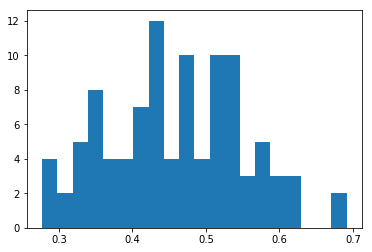

In [49]:
%matplotlib inline
import matplotlib.pyplot as plt

_ = plt.hist(hcpv, bins=20)

The histogram looks a bit ragged, but this is probably because of the relatively small number of samples.

### EXERCISE

1. How does the histogram look if you take 1000 samples instead of 100?
1. Make distributions for some of the other properties, like thickness and FVF.
1. Maybe our functions should check that we don't get unreasonable values, like negative numbers, or decimal fractions over 1.0 Try to implement this if you have time.

# Reading data from a file

Let's try reading data from a CSV.

## Using `pandas`

<hr />

<div>
<img src="https://avatars1.githubusercontent.com/u/1692321?s=50"><p style="text-align:center">© Agile Geoscience 2016</p>
</div>